In [5]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

In [91]:
m_pi = 1/13

def amp_integrand(x, s):
    return x*(1-x)*np.log(np.abs(1-s*x*(1-x)))

def angle_integrand(x, s):
    return x*(1-x)*np.heaviside(s*x*(1-x)-1, 0)*np.pi

def imag_part_analytic(s):

    imag_part = np.zeros_like(s)

    for i in range(len(s)):
        if s[i] < 4:
            imag_part[i] = 0
        else:
            imag_part[i] = 1/12/np.pi*(4*m_pi**2/s[i]-1)*np.sqrt(1-4/s[i])*(1+2/s[i])

    return imag_part

In [102]:
s = np.linspace(2*m_pi**2, 5, 1000)
m_real = np.zeros(len(s))
m_imag = np.zeros(len(s))
m_sq = np.zeros(len(s))


for i in range(len(s)):
    amp = quad(amp_integrand, 0, 1, args=(s[i]))[0]
    angle = quad(angle_integrand, 0, 1, args=(s[i]))[0]
    m_real[i] = (4*m_pi**2/s[i]-1)*(1+1/2/np.pi**2*amp)
    m_imag[i] = (4*m_pi**2/s[i]-1)/2/np.pi**2*angle
    m_sq[i] = m_real[i]**2 + m_imag[i]**2

/Users/jiatongyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  
/Users/jiatongyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling t

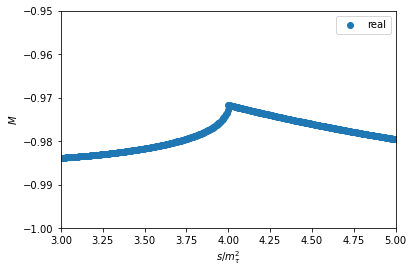

In [119]:
plt.scatter(s, m_real, label='real')
#plt.scatter(s, m_imag, color='g', label='imag')
#plt.plot(s, imag_part_analytic(s), color='r', label='analytic')
plt.xlabel(r'$s/m_{\tau}^2$')
plt.ylabel(r'$M$')
plt.xlim(3,5)
plt.ylim(-1, -0.95)
#plt.yscale('log')
plt.legend()    
plt.savefig('plot_real.pdf', bbox_inches='tight')

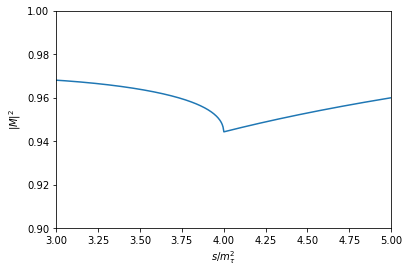

In [105]:
plt.plot(s, m_sq)
plt.xlabel(r'$s/m_{\tau}^2$')
plt.ylabel(r'$|M|^2$')
plt.ylim(0.9, 1.0)
plt.xlim(3,5)
plt.savefig('plot.pdf', bbox_inches='tight')
